In [1]:
import pandas as pd

best_practices = pd.read_csv("Best practices assessment.csv")
best_practices

,How many years of software engineering experience do you have?,How many years of data science experience do you have?,Write reusable scripts for data cleaning and merging,Make datasets available on shared infrastructure,"Use versioning for data, model, configurations and training scripts",Continuously monitor the behaviour of deployed models,Log production predictions with the model’s version and input data,Store models in a single format for ease of use,"Equip with web interface, package image, provide REST API",Provide simple API for serving batch and real-time requests,Integration with existing data infrastructure,"Querying, visualising and understanding metrics and event logging",Allow experimentation with the inference code,Keep the model’s API and documentation together,Parallelise feature extraction,Cache predictions,Async support for top-down chaining models
0,3,1,Strongly agree,Agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
1,6,2,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Disagree,Strongly agree,Strongly disagree
2,1,5,Strongly disagree,Disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly disagree,Strongly disagree,Disagree
3,3,3,Agree,Agree,Disagree,Neither agree nor disagree,Agree,Not applicable,Not applicable,Neither agree nor disagree,Agree,Disagree,Agree,Strongly agree,Not applicable,Neither agree nor disagree,Agree
4,1,7,Neither agree nor disagree,Disagree,Neither agree nor disagree,Disagree,Strongly disagree,Not applicable,Not applicable,Disagree,Strongly disagree,Disagree,Disagree,Neither agree nor disagree,Strongly disagree,Strongly agree,Not applicable
5,6,0,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Disagree,Strongly agree,Agree,Strongly agree,Not applicable
6,2,2,Disagree,Neither agree nor disagree,Agree,Strongly agree,Neither agree nor disagree,Disagree,Strongly agree,Disagree,Disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Not applicable,Disagree,Strongly agree
7,1,2,Disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Disagree,Agree,Strongly disagree,Not applicable,Strongly disagree,Strongly disagree
8,0,1,Strongly disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Disagree,Agree,Strongly disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Disagree,Disagree,Strongly disagree
9,7,1,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Strongly disagree,Strongly agree,Not applicable,Agree,Agree,Strongly agree,Strongly agree,Agree


In [2]:
m = {
    "Strongly agree": 4 / 4,
    "Agree": 3 / 4,
    "Neither agree nor disagree": 2 / 4,
    "Disagree": 1 / 4,
    "Strongly disagree": 0 / 4,
}

best_practices_dicts = [v.to_dict() for _, v in best_practices.iterrows()]

best_practice_score_ds = []
best_practice_score_se = []

for d in best_practices_dicts:
    ds_experience = int(d["How many years of data science experience do you have?"])
    del d["How many years of data science experience do you have?"]

    se_experience = int(
        d["How many years of software engineering experience do you have?"]
    )
    del d["How many years of software engineering experience do you have?"]

    scores = [m[v] for v in d.values() if v != "Not applicable"]
    score = sum(scores) / len(scores)
    best_practice_score_ds.append((ds_experience, score))
    best_practice_score_se.append((se_experience, score))

(-0.5440527060340572, 0.10399880919437814)

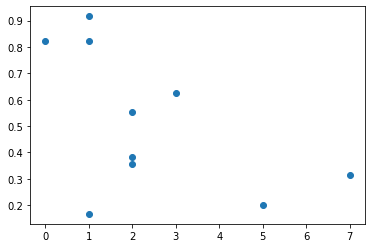

In [3]:
import matplotlib.pyplot as plt
from scipy import stats

best_practice_score_ds = sorted(best_practice_score_ds)
plt.scatter(
    [x for x, y in best_practice_score_ds], [y for x, y in best_practice_score_ds]
)
stats.pearsonr(
    [x for x, y in best_practice_score_ds], [y for x, y in best_practice_score_ds]
)

(0.6722543326178704, 0.03321124881554773)

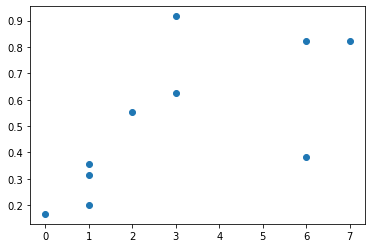

In [4]:
best_practice_score_se = sorted(best_practice_score_se)


plt.scatter(
    [x for x, y in best_practice_score_se], [y for x, y in best_practice_score_se]
)
stats.pearsonr(
    [x for x, y in best_practice_score_se], [y for x, y in best_practice_score_se]
)

In [5]:
tam = pd.read_csv("Technology acceptance model questionnaire.csv")
tam

,I believe the use of GreatAI improves the quality of AI deployments.,I believe the use of GreatAI would increase my productivity.,I believe the use of GreatAI can lead to robust and trustworthy deployments.,"Overall, I found GreatAI useful when working with AI.",I found the GreatAI easy to learn.,I found it is easy to employ GreatAI in practice.,I found it is easy to integrate GreatAI into an existing project.,"Overall, I found GreatAI easy to use.","Assuming GreatAI is applicable to my task, I predict that I will use it on a regular basis in the future.","Overall, I intend to use the GreatAI in my personal or professional projects."
0,7,7,7,7,7,7,7,7,7,7
1,7,7,6,7,5,6,7,6,7,7
2,4,4,5,6,6,5,4,4,5,4
3,6,7,6,7,7,6,7,6,7,6
4,7,7,6,7,4,5,5,5,6,6
5,6,6,6,6,6,6,6,6,6,6
6,6,6,6,4,5,7,6,6,7,7
7,7,6,6,6,4,5,3,5,5,6
8,4,5,5,5,7,2,3,3,3,3
9,7,7,7,7,5,6,5,6,7,7


In [6]:
import pingouin

pu = [
    "I believe the use of GreatAI improves the quality of AI deployments.",
    "I believe the use of GreatAI would increase my productivity.",
    "I believe the use of GreatAI can lead to robust and trustworthy deployments.",
    "Overall, I found GreatAI useful when working with AI.",
]
pingouin.cronbach_alpha(tam[pu])

(0.8813771517996869, array([0.688, 0.967]))

In [7]:
peou = [
    "I found the GreatAI easy to learn.",
    "I found it is easy to employ GreatAI in practice.",
    "I found it is easy to integrate GreatAI into an existing project.",
    "Overall, I found GreatAI easy to use.",
]
pingouin.cronbach_alpha(tam[peou])

(0.7729220222793487, array([0.403, 0.937]))

In [8]:
itu = [
    "Assuming GreatAI is applicable to my task, I predict that I will use it on a regular basis in the future.",
    "Overall, I intend to use the GreatAI in my personal or professional projects.",
]
pingouin.cronbach_alpha(tam[itu])

(0.9538950715421304, array([0.814, 0.989]))

In [9]:
tam["pu"] = tam[pu].mean(1)
tam["peou"] = tam[peou].mean(1)
tam["itu"] = tam[itu].mean(1)
tam[["pu", "peou", "itu"]]

,pu,peou,itu
0,7.00,7.00,7.0
1,6.75,6.00,7.0
2,4.75,4.75,4.5
3,6.50,6.50,6.5
4,6.75,4.75,6.0
5,6.00,6.00,6.0
6,5.50,6.00,7.0
7,6.25,4.25,5.5
8,4.75,3.75,3.0
9,7.00,5.50,7.0


In [10]:
stats.pearsonr(tam["peou"], tam["pu"])

(0.5515422017785757, 0.09838124227663879)

In [11]:
stats.pearsonr(tam["peou"], tam["itu"])

(0.8066270322592023, 0.004809023073123024)

In [12]:
stats.pearsonr(tam["pu"], tam["itu"])

(0.7880605510627579, 0.006774486564715021)